## Depois fazer um notebook pra arrumar tudo direito

# Sem dropar linhas NaN

Importando dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
Data = pd.read_csv('Data/water_potability.csv')
Data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
Data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

Renomeando as colunas para o português: 

In [4]:
Data = Data.rename(columns={'Hardness'        :  'Dureza',
                     'Solids'          :  'Sólidos',
                     'Chloramines'     :  'Cloraminas',
                     'Sulfate'         :  'Sulfato',
                     'Conductivity'    :  'Condutividade',
                     'Organic_carbon'  :  'Carbono organico',
                     'Trihalomethanes' :  'Trialometanos',
                     'Turbidity'       :  'Turbidez',
                     'Potability'      :  'Potabilidade'})

Data

ph      Dureza       Sólidos  Cloraminas     Sulfato  \
0          NaN  204.890455  20791.318981    7.300212  368.516441   
1     3.716080  129.422921  18630.057858    6.635246         NaN   
2     8.099124  224.236259  19909.541732    9.275884         NaN   
3     8.316766  214.373394  22018.417441    8.059332  356.886136   
4     9.092223  181.101509  17978.986339    6.546600  310.135738   
...        ...         ...           ...         ...         ...   
3271  4.668102  193.681735  47580.991603    7.166639  359.948574   
3272  7.808856  193.553212  17329.802160    8.061362         NaN   
3273  9.419510  175.762646  33155.578218    7.350233         NaN   
3274  5.126763  230.603758  11983.869376    6.303357         NaN   
3275  7.874671  195.102299  17404.177061    7.509306         NaN   

      Condutividade  Carbono organico  Trialometanos  Turbidez  Potabilidade  
0        564.308654         10.379783      86.990970  2.963135             0  
1        592.885359         15.180013      56.329076  4.500656             0  
2        418.606213         16.868637      66.420093  3.055934             0  
3        363.266516         18.436524     100.341674  4.628771             0  
4        398.410813         11.558279      31.997993  4.075075             0  
...             ...               ...            ...       ...           ...  
3271     526.424171         13.894419      66.687695  4.435821             1  
3272     392.449580         19.903225            NaN  2.798243             1  
3273     432.044783         11.039070      69.845400  3.298875             1  
3274     402.883113         11.168946      77.488213  4.708658             1  
3275     327.459760         16.140368      78.698446  2.309149             1  

[3276 rows x 10 columns]

In [5]:
Data.Potabilidade.value_counts()

0    1998
1    1278
Name: Potabilidade, dtype: int64

### Explicando as variáveis para por no slide depois:

* ___ph___: ph da água

* ___Dureza___: 
Capacidade da água para precipitar sabão em mg/L

* ___Sólidos___: Total de sólidos dissolvidos em ppm

* ___Cloraminas___: Quantidade de Cloraminas em ppm


* ___Sulfato___: Quantidade de sulfatos dissolvidos em mg/L

* __Condutividade__: Condutividade elétrica da água em μS/cm

* ___Carbono organico___: Quantidade de carbono orgânico em ppm

* ___Trialometanos___: Quantidade de Trialometanos em μg/L

* ___Turbidez___: Medida da propriedade de emissão de luz da água em NTU (Unidades Nefelométricas de Turbidez)


* ___Potabilidade___: Indica se a água é segura para consumo humano( 1 é potável, 0 não é potável)

Vendo se tem NaN

In [6]:
Data.isnull().sum()

ph                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

In [7]:
(Data.isnull().sum()/len(Data))*100

#porcentagem de NaN

ph                  14.987790
Dureza               0.000000
Sólidos              0.000000
Cloraminas           0.000000
Sulfato             23.840049
Condutividade        0.000000
Carbono organico     0.000000
Trialometanos        4.945055
Turbidez             0.000000
Potabilidade         0.000000
dtype: float64

* No Trialometano, a gente vai substituir os NaN pela média, pois de acordo com a Agência de Proteção Ambiental (EPA) o valor máximo de Trialometanos na água é de 100ug/L e 66.4mg/l está dentro do valor permitido. (<http://sanepar.com.br/sanepar/sanare/v17/TRIHALOMETANOS.htm>)

In [8]:
print(Data.Trialometanos.describe())
print('------------------------------')
print('valor da mediana:', Data.Trialometanos.median())



count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trialometanos, dtype: float64
------------------------------
valor da mediana: 66.62248509808484


* No Sulfato vamos substituir os NaN pela média menos o valor minimo, pois a media é 333mg/L e isso é ruim para o ser humano consumir dado q o valor máximo de sulfato numa água potável deve ser de 250mg/L de acordo com o Ministério da Saúde. (<https://bvsms.saude.gov.br/bvs/saudelegis/gm/2004/prt0518_25_03_2004.html>)

In [9]:
print(Data.Sulfato.describe())
print('--------------------------------------')
print('valor mediana:', Data.Sulfato.median())
print('--------------------------------------')
print('valor da média menos o valor minimo:',Data.Sulfato.mean() - Data.Sulfato.min())

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfato, dtype: float64
--------------------------------------
valor mediana: 333.073545745888
--------------------------------------
valor da média menos o valor minimo: 204.7757766108135


* No Ph vamos substituir pela mediana pois segundo o Ministério da Saúde, o pH ideal da água deve ser mantido entre 6 e 9,5.

In [10]:
Data.ph.describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Substituindo os NaN pela mediana da coluna

In [11]:
Data.ph.fillna(value = Data.ph.median(), inplace = True)
Data.Sulfato.fillna(Data.Sulfato.mean() - Data.Sulfato.min(),inplace = True)
Data.Trialometanos.fillna(Data.Trialometanos.mean(),inplace=True)

In [12]:
Data.isnull().sum()

ph                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfato             0
Condutividade       0
Carbono organico    0
Trialometanos       0
Turbidez            0
Potabilidade        0
dtype: int64

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ph                3276 non-null   float64
 1   Dureza            3276 non-null   float64
 2   Sólidos           3276 non-null   float64
 3   Cloraminas        3276 non-null   float64
 4   Sulfato           3276 non-null   float64
 5   Condutividade     3276 non-null   float64
 6   Carbono organico  3276 non-null   float64
 7   Trialometanos     3276 non-null   float64
 8   Turbidez          3276 non-null   float64
 9   Potabilidade      3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
Data.Potabilidade.value_counts(normalize=True)*100

0    60.989011
1    39.010989
Name: Potabilidade, dtype: float64

60,99% não é potável e 39,01 é potável

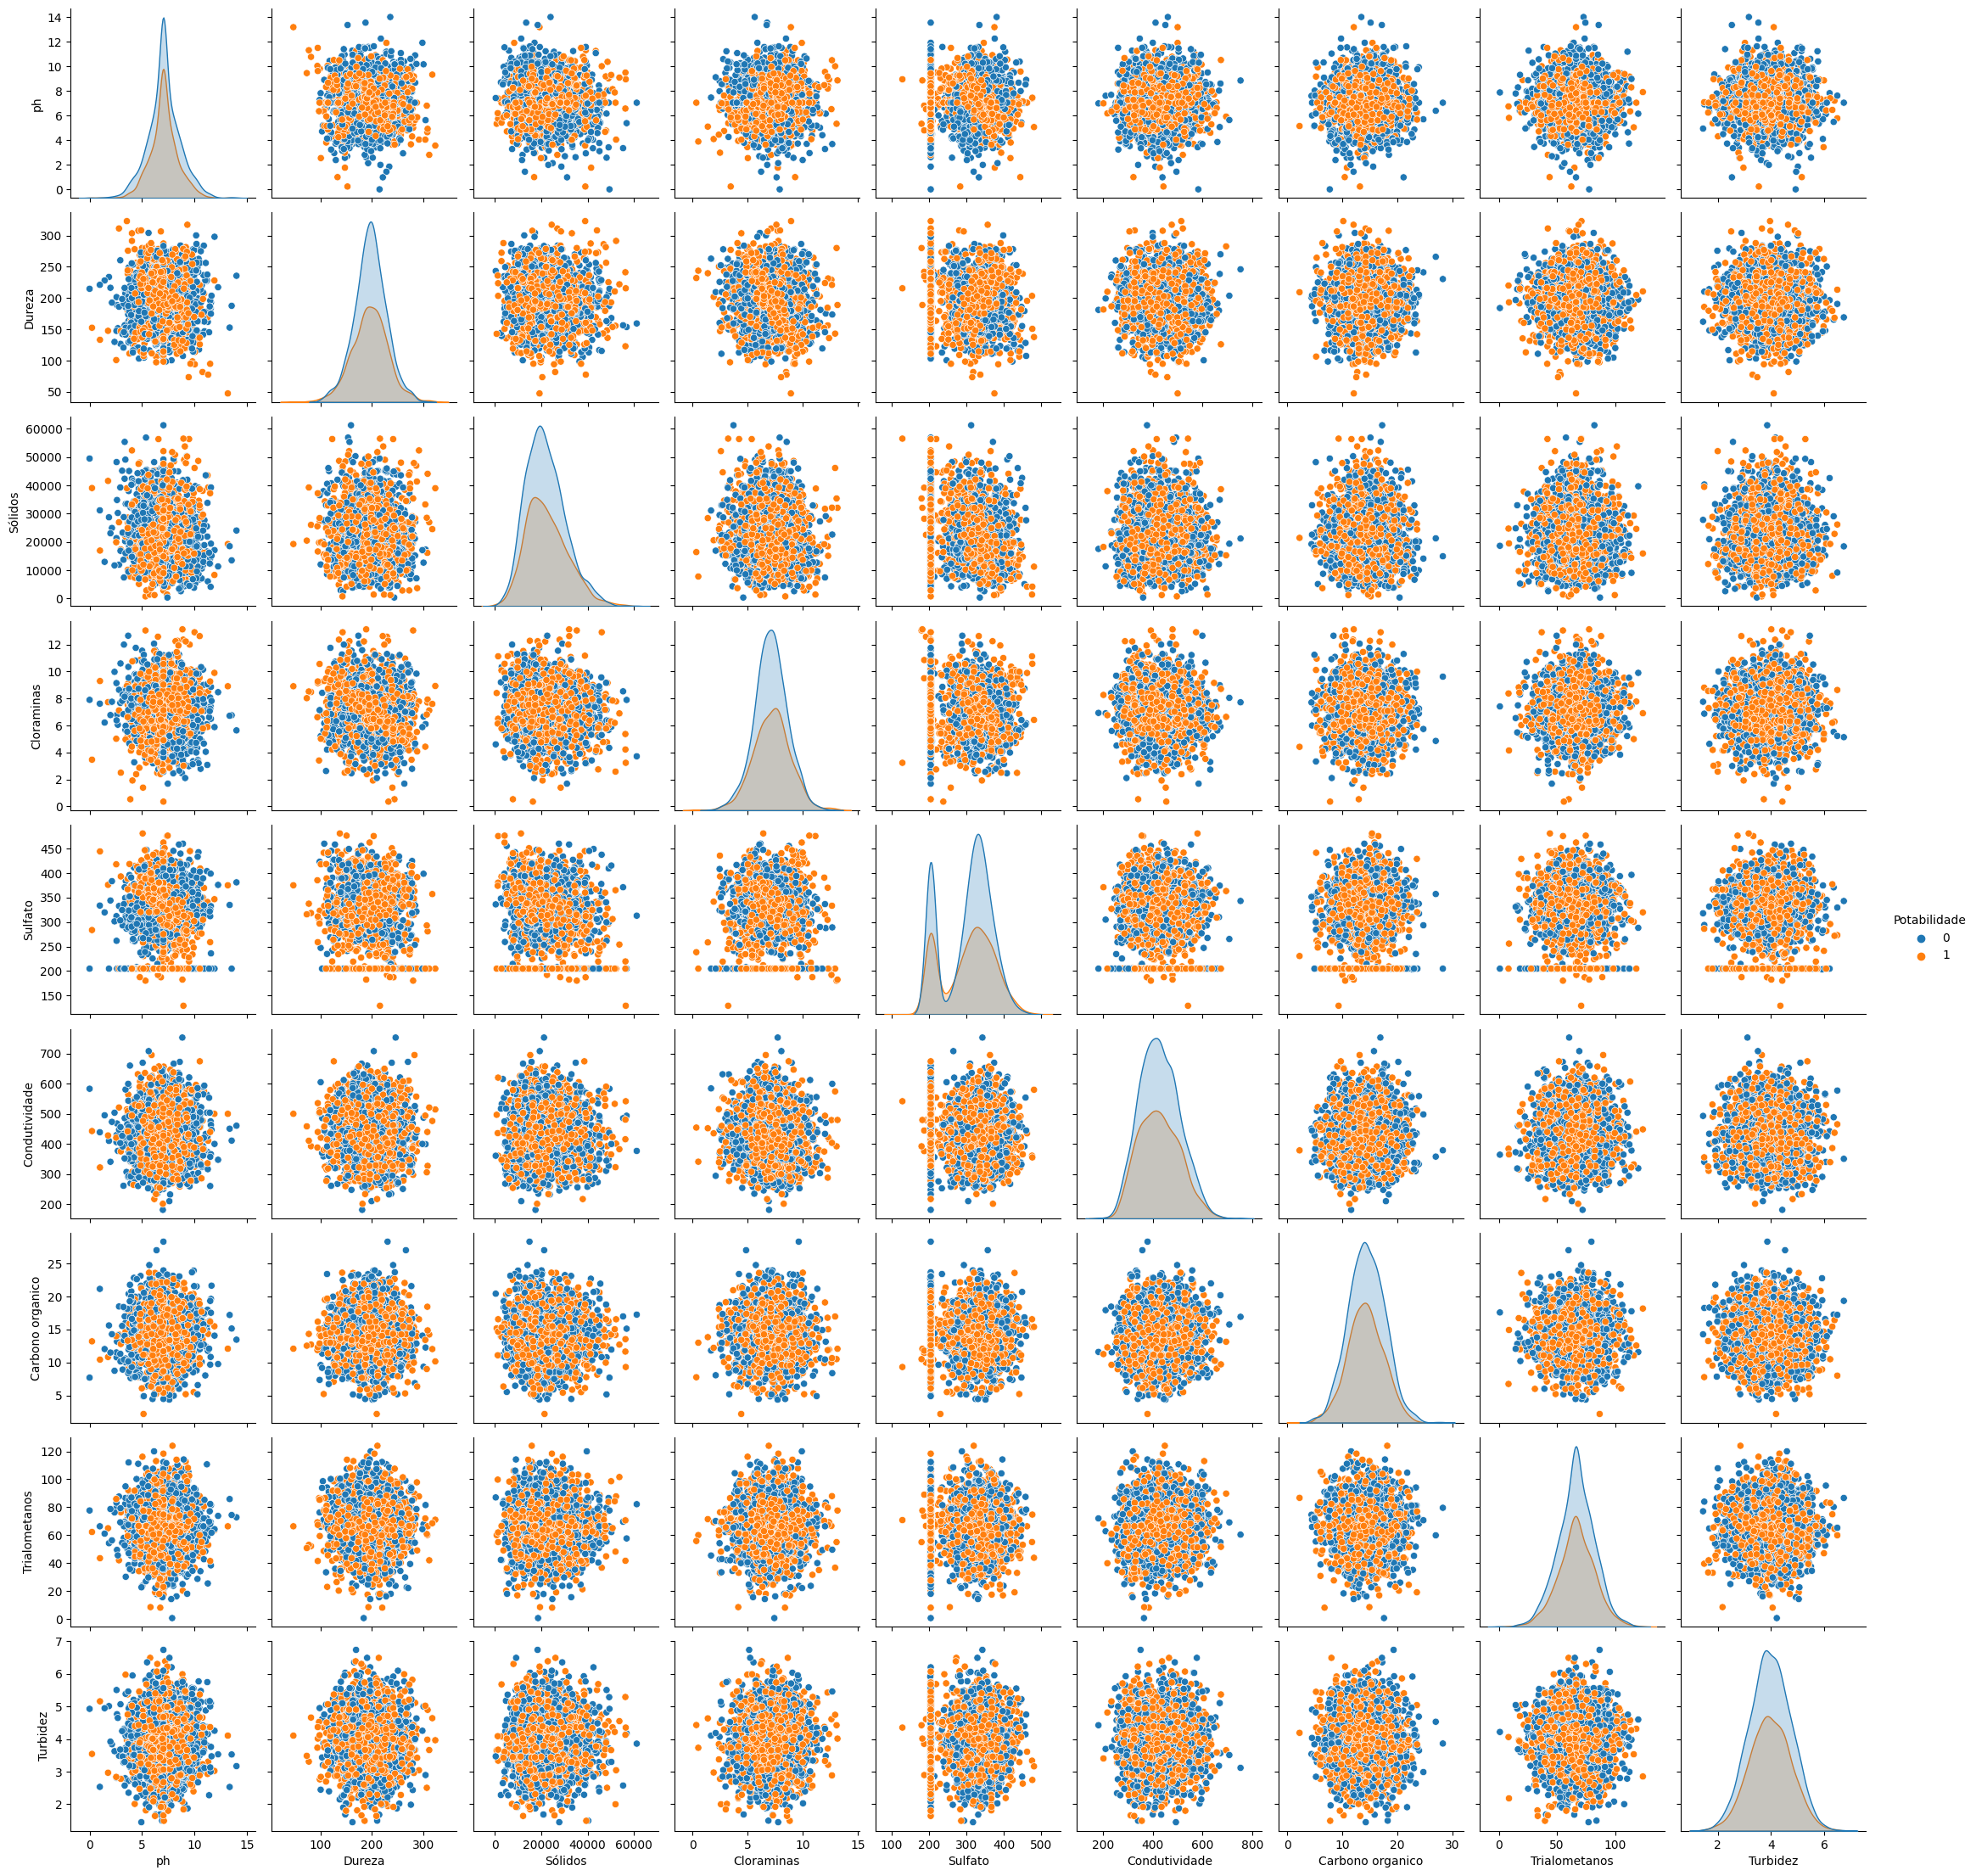

In [18]:
sns.pairplot(Data, hue ='Potabilidade')

<AxesSubplot:>

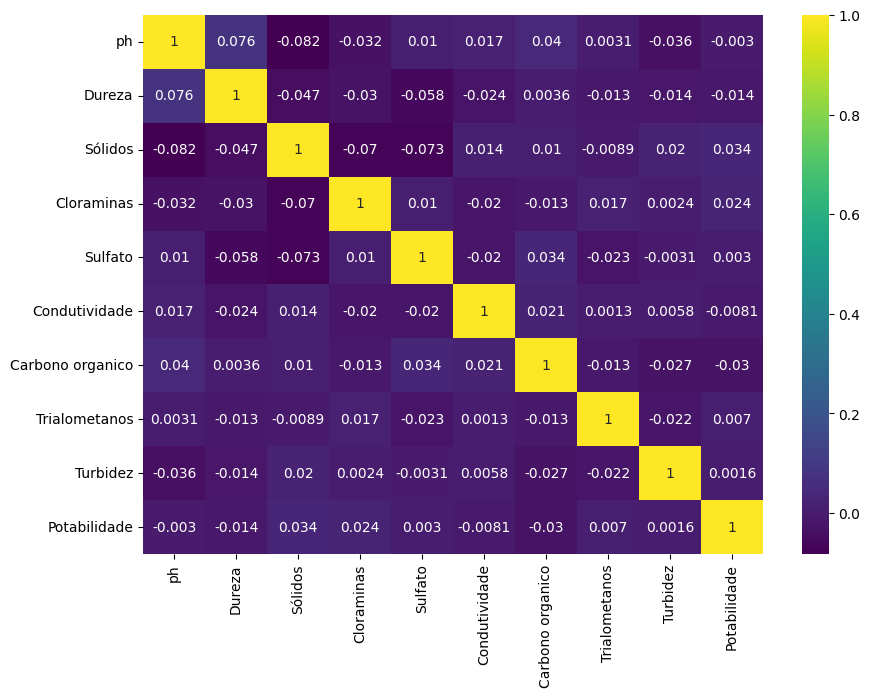

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(Data.corr(),annot=True,cmap='viridis')

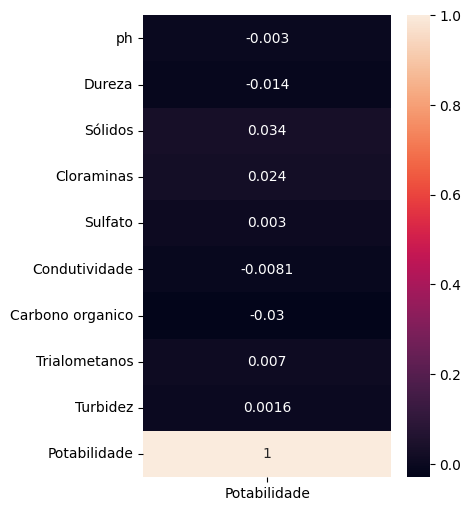

In [20]:
plt.figure(figsize = (4,6))
sns.heatmap(Data.corr()[['Potabilidade']], 
            annot = True
           );

### Modelos de Classificação:

#### KNN (K Neighbors Classifier)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X



ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
0    -0.025474  0.259195 -0.139471    0.112415  0.995621       1.708954   
1    -2.284717 -2.036414 -0.385987   -0.307694 -1.493505       2.062575   
2     0.697319  0.847665 -0.240047    1.360594 -1.493505      -0.094032   
3     0.845393  0.547651  0.000493    0.592008  0.818821      -0.778830   
4     1.372982 -0.464429 -0.460249   -0.363698  0.108139      -0.343939   
...        ...       ...       ...         ...       ...            ...   
3271 -1.637002 -0.081758  2.916188    0.028027  0.865375       1.240155   
3272  0.499833 -0.085667 -0.534295    0.593290 -1.493505      -0.417706   
3273  1.595654 -0.626829  1.270810    0.144017 -1.493505       0.072263   
3274 -1.324949  1.041355 -1.144058   -0.517373 -1.493505      -0.288597   
3275  0.544611 -0.038546 -0.525812    0.244515 -1.493505      -1.221919   

      Carbono organico  Trialometanos  Turbidez  
0            -1.180651       1.306149 -1.286298  
1             0.270597      -0.638480  0.684218  
2             0.781117       0.001509 -1.167365  
3             1.255134       2.152874  0.848412  
4            -0.824357      -2.181599  0.138786  
...                ...            ...       ...  
3271         -0.118075       0.018481  0.601124  
3272          1.698560       0.000000 -1.497627  
3273         -0.981329       0.218748 -0.856007  
3274         -0.942064       0.703468  0.950797  
3275          0.560940       0.780223 -2.124459  

[3276 rows x 9 columns]

In [22]:
# separa em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste')

Há 2194 dados de treino e 1082 dados de teste


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# instanciamos o modelo especificando o valor desejado de k com o argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors = 19)

In [25]:
# ajustamos o modelo aos dados de treinamento
knn.fit(X_train, y_train);

In [26]:
y_pred = knn.predict(X_test)

In [27]:
Data.columns

Index(['ph', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade',
       'Carbono organico', 'Trialometanos', 'Turbidez', 'Potabilidade'],
      dtype='object')

In [28]:
# montamos uma tabela com as previsões, indicando se estavam corretas ou não
Data_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index = y_test.index), 
                     y_test == y_pred], 
                    axis = 1
                   )

Data_pred.columns = ['ph', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade',
                   'Carbono organico', 'Trialometanos', 'Turbidez', 'Potabilidade', 
                   'y_pred', 'pred_ok']
Data_pred

ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
2947 -0.025474 -0.390829 -0.177119    0.133264  0.457529      -0.864183   
2782 -0.293258 -0.226799  1.238672   -0.208970  0.468617      -1.109290   
1644  0.525144  0.842269  0.142578   -0.758072 -0.039821      -0.473122   
70    0.058697 -0.403963 -1.741798   -2.097011 -0.386471       0.022660   
2045 -0.312178 -0.521033  0.499447    1.381617 -1.493505       0.868172   
...        ...       ...       ...         ...       ...            ...   
1662 -0.726230  0.927904 -0.197827    0.659661 -1.178210      -1.858870   
445  -0.235532  0.144713  0.099769    0.342239  0.249936      -1.245705   
617  -0.536944  0.012337  0.821186    0.888601  0.478178       1.835570   
1474 -0.852442  0.233596  1.729156    0.471012  0.395204       0.502132   
2555 -0.947318 -1.377457  0.497238   -0.929143 -1.493505       0.523037   

      Carbono organico  Trialometanos  Turbidez  Potabilidade  y_pred  pred_ok  
2947          1.781944       0.039550  1.178894             0       0     True  
2782          0.127534       0.091870  0.763090             1       0    False  
1644         -0.265515      -1.479064 -1.895280             0       0     True  
70           -1.356049       1.499231 -0.104958             0       0     True  
2045         -0.453002       0.752567  0.623709             1       1     True  
...                ...            ...       ...           ...     ...      ...  
1662         -1.401047      -0.872446  0.087110             0       0     True  
445           0.756831      -0.471545  0.568925             0       0     True  
617          -0.964150       0.000000  2.225533             0       0     True  
1474         -0.089569       1.929965  0.518149             0       0     True  
2555         -1.711536       2.273678  1.804994             0       0     True  

[1082 rows x 12 columns]

In [29]:
# obtemos a matriz de confusão
from sklearn.metrics import confusion_matrix
MCKNN = confusion_matrix(y_test, y_pred)
MCKNN

array([[580, 100],
       [299, 103]], dtype=int64)

In [30]:
# a coluna 'pred_ok' indica com variáveis booleanos se a previsão estava correta
# a média desta série indica a proporção de classificação correta 
Data_pred['pred_ok'].mean()

0.6312384473197782

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6312384473197782

<AxesSubplot:>

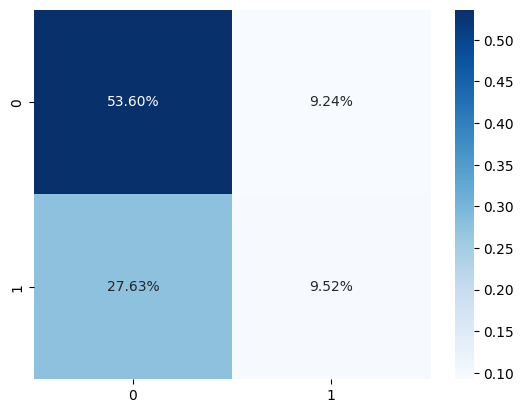

In [32]:
KNN_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [33]:
Data.shape

(3276, 10)

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       680
           1       0.51      0.26      0.34       402

    accuracy                           0.63      1082
   macro avg       0.58      0.55      0.54      1082
weighted avg       0.60      0.63      0.59      1082



* precision: Porcentagem de previsões positivas corretas em relação ao total de previsões positivas
* recall: Porcentagem de previsões positivas corretas em relação ao total de positivos reais.
* f1-score: Uma média harmônica ponderada de precisão e recall. Quanto mais próximo de 1, melhor o modelo.

1. O Modelo previu que 43% dos index de cada água são potáveis;
2. De todos os index de cada água que realmente era potável, o modelo só previu esse resultado corretamente para 19% deles;
3. F1-score = 0.26, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não
4. 680 index de água não são potáveis e 402 são potáveis nos dados de teste

#### Naive Bayes

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


#features = X.columns
#X[features] = sc.fit_transform(X[features])
#X


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


In [38]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = gnb.predict(X_test)

In [40]:
round(accuracy_score(y_test, y_pred),2)

0.63

In [41]:
y_test.shape

(983,)

In [42]:
y_pred.shape

(983,)

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', conf_mat)


Confusion matrix

 [[565  52]
 [315  51]]


<AxesSubplot:>

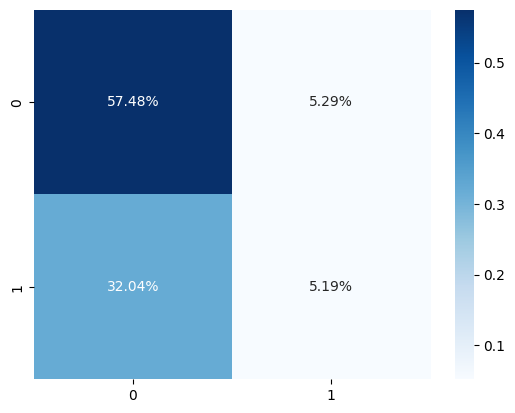

In [44]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot = True, fmt = '0.2%', cmap = 'Blues')

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.75       617
           1       0.50      0.14      0.22       366

    accuracy                           0.63       983
   macro avg       0.57      0.53      0.49       983
weighted avg       0.59      0.63      0.55       983



1. O Modelo previu que 50% dos index de cada água são potáveis;
2. De todos os index de cada água que realmente era potável, o modelo só previu esse resultado corretamente para 14% deles;
3. F1-score = 0.22, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não
4. 617 index de água não são potáveis e 366 são potáveis nos dados de teste

In [43]:
# montamos uma tabela com as previsões, indicando se estavam corretas ou não
Data_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index = y_test.index), 
                     y_test == y_pred], 
                    axis = 1
                   )

Data_pred.columns = ['ph', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade',
                   'Carbono organico', 'Trialometanos', 'Turbidez', 'Potabilidade', 
                   'y_pred', 'pred_ok']
Data_pred

ph      Dureza       Sólidos  Cloraminas     Sulfato  \
2947  7.036752  183.521107  20461.252710    7.333212  333.119476   
2782  6.643159  188.913541  32873.820022    6.791509  333.848842   
1644  7.846058  224.058877  23264.109968    5.922367  300.402620   
70    7.160467  183.089310   6743.346066    3.803036  277.599099   
2045  6.615350  179.240661  26392.863612    9.309160  204.775777   
...        ...         ...           ...         ...         ...   
542   9.895889  210.654041  13189.519383    4.945128  204.775777   
3189  6.886513  211.454417  35018.325600    6.067597  204.775777   
1921  7.288737  233.977810  31617.075415    8.533888  331.838167   
2839  7.243482  196.982379  29772.019247    6.497201  204.775777   
2484  6.653650  172.584512  34816.444538    8.289307  293.611048   

      Condutividade  Carbono organico  Trialometanos  Turbidez  Potabilidade  \
2947     356.369022         20.179029      67.019903  4.886634             0   
2782     336.561501         14.706810      67.844849  4.562198             1   
1644     387.971336         13.406737      43.075186  2.487969             0   
70       428.036344          9.799625      90.035374  3.884891             0   
2045     496.363562         12.786595      78.262369  4.453443             1   
...             ...               ...            ...       ...           ...   
542      481.136793         11.763453      49.851928  3.813429             0   
3189     549.997058          8.445127      27.663174  3.599756             1   
1921     490.047095         12.225342      31.802024  3.531385             1   
2839     322.365237         14.154955      50.655001  4.763579             1   
2484     389.471149         15.872474      67.976869  4.871406             0   

      y_pred  pred_ok  
2947       0     True  
2782       0    False  
1644       0     True  
70         0     True  
2045       0    False  
...      ...      ...  
542        0     True  
3189       0    False  
1921       0    False  
2839       0    False  
2484       0     True  

[983 rows x 12 columns]

#### Regressão Logística

In [107]:
# matriz de features
X = Data.drop(columns = ['Potabilidade'])


# variável target
y = Data['Potabilidade']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [109]:
# Padronizamos os dados para que a regularização seja correta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
accuracy_score(y_train, lr.predict(X_train_std))

0.6105006105006106

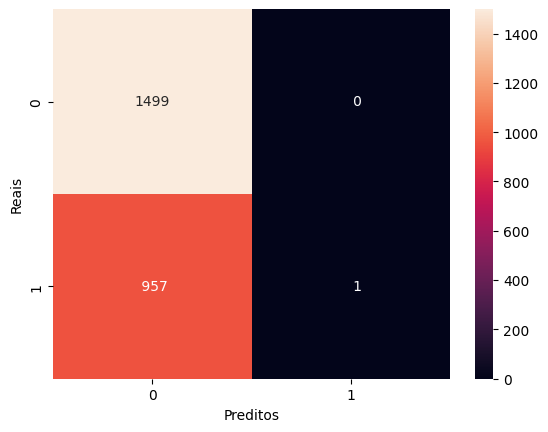

In [113]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

In [114]:
lr.predict_proba(X_train_std[y_train == 0])[ : , 1]

array([0.37174468, 0.36944483, 0.3883066 , ..., 0.37515382, 0.37862706,
       0.3602523 ])

In [115]:
# verificamos que as proporções da variável target no treino e teste são correspondentes
y_train.mean(), y_test.mean()

(0.3899063899063899, 0.3907203907203907)

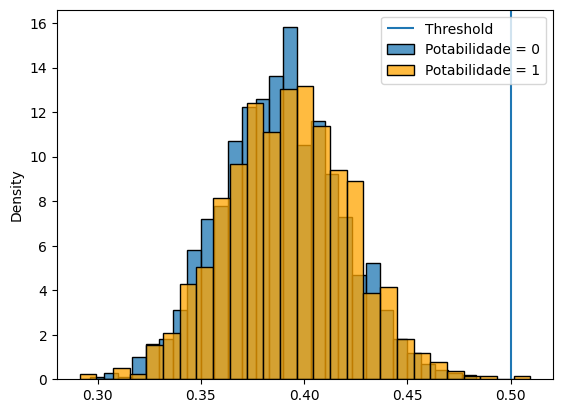

In [116]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train == 0])[ : , 1], 
             stat = 'density'
            )

sns.histplot(data = lr.predict_proba(X_train_std[y_train == 1])[ : , 1], 
             stat = 'density', 
             color = 'orange'
            )
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Threshold', 'Potabilidade = 0', 'Potabilidade = 1']);

In [117]:
threshold = 0.45
probs = lr.predict_proba(X_train_std)[:,1]
y_pred = probs > threshold

In [118]:
accuracy_score(y_train, y_pred)

0.6105006105006106

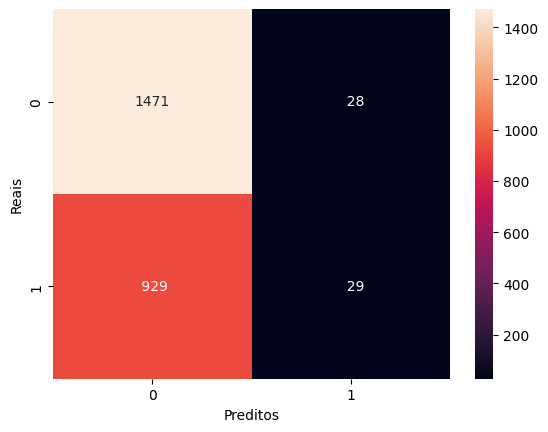

In [119]:
sns.heatmap(confusion_matrix(y_train, y_pred), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

In [125]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [819, 2457]

1. O Modelo previu que 51% dos index de cada água são potáveis;
2. De todos os index de cada água que realmente era potável, o modelo só previu esse resultado corretamente para 3% deles;
3. F1-score = 0.06, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não
4. 1499 index de água não são potáveis e 958 são potáveis nos dados de teste

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

In [121]:
y_test.shape

(819,)

In [122]:
y_train.shape

(2457,)

In [124]:
y_pred.shape

(2457,)

# Dropando linhas NaN

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [96]:
Df = pd.read_csv('Data/water_potability.csv')
Df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [97]:
Df = Df.rename(columns={'Hardness'     :  'Dureza',
                     'Solids'          :  'Sólidos',
                     'Chloramines'     :  'Cloraminas',
                     'Sulfate'         :  'Sulfato',
                     'Conductivity'    :  'Condutividade',
                     'Organic_carbon'  :  'Carbono organico',
                     'Trihalomethanes' :  'Trialometanos',
                     'Turbidity'       :  'Turbidez',
                     'Potability'      :  'Potabilidade'})

Df

ph      Dureza       Sólidos  Cloraminas     Sulfato  \
0          NaN  204.890455  20791.318981    7.300212  368.516441   
1     3.716080  129.422921  18630.057858    6.635246         NaN   
2     8.099124  224.236259  19909.541732    9.275884         NaN   
3     8.316766  214.373394  22018.417441    8.059332  356.886136   
4     9.092223  181.101509  17978.986339    6.546600  310.135738   
...        ...         ...           ...         ...         ...   
3271  4.668102  193.681735  47580.991603    7.166639  359.948574   
3272  7.808856  193.553212  17329.802160    8.061362         NaN   
3273  9.419510  175.762646  33155.578218    7.350233         NaN   
3274  5.126763  230.603758  11983.869376    6.303357         NaN   
3275  7.874671  195.102299  17404.177061    7.509306         NaN   

      Condutividade  Carbono organico  Trialometanos  Turbidez  Potabilidade  
0        564.308654         10.379783      86.990970  2.963135             0  
1        592.885359         15.180013      56.329076  4.500656             0  
2        418.606213         16.868637      66.420093  3.055934             0  
3        363.266516         18.436524     100.341674  4.628771             0  
4        398.410813         11.558279      31.997993  4.075075             0  
...             ...               ...            ...       ...           ...  
3271     526.424171         13.894419      66.687695  4.435821             1  
3272     392.449580         19.903225            NaN  2.798243             1  
3273     432.044783         11.039070      69.845400  3.298875             1  
3274     402.883113         11.168946      77.488213  4.708658             1  
3275     327.459760         16.140368      78.698446  2.309149             1  

[3276 rows x 10 columns]

In [98]:
Df.Potabilidade.value_counts()

0    1998
1    1278
Name: Potabilidade, dtype: int64

In [99]:
Df.isnull().sum()

ph                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

In [100]:
(Df.isnull().sum()/len(Df))*100

#porcentagem de NaN

ph                  14.987790
Dureza               0.000000
Sólidos              0.000000
Cloraminas           0.000000
Sulfato             23.840049
Condutividade        0.000000
Carbono organico     0.000000
Trialometanos        4.945055
Turbidez             0.000000
Potabilidade         0.000000
dtype: float64

In [101]:
df = Df.dropna(axis = 0)

In [102]:
df.Potabilidade.value_counts(normalize=True)*100

0    59.671805
1    40.328195
Name: Potabilidade, dtype: float64

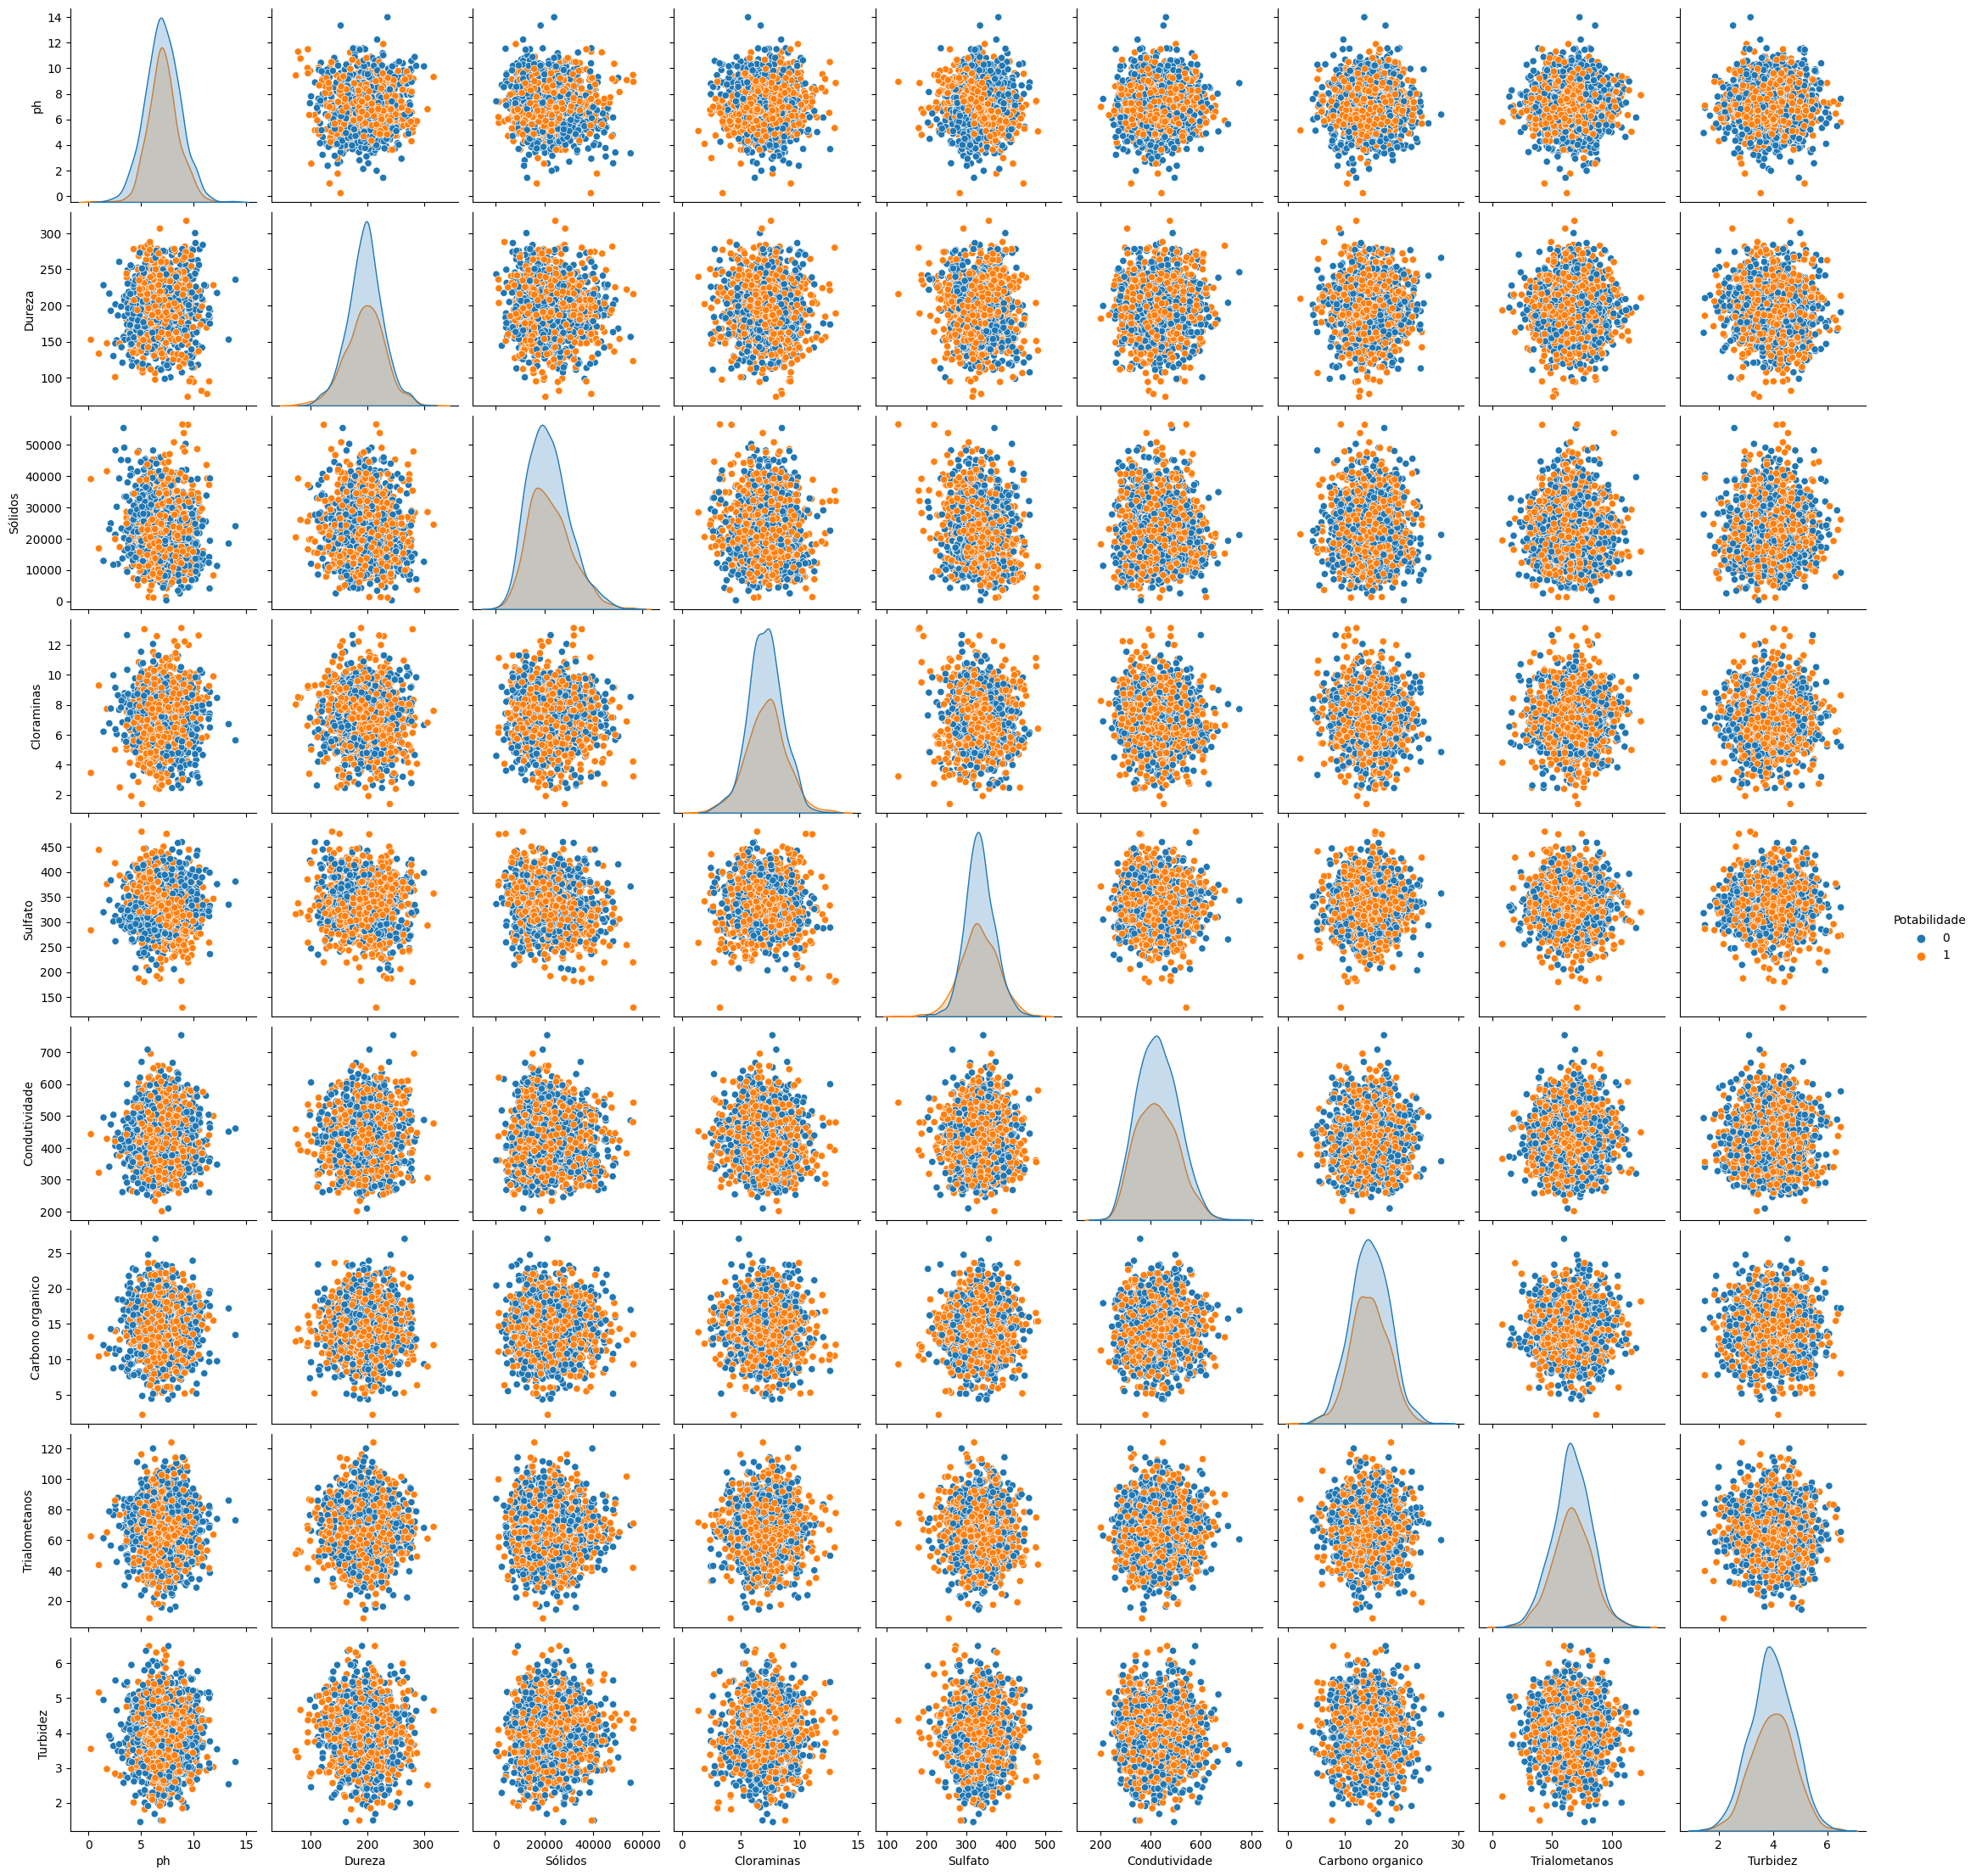

In [103]:
sns.pairplot(df, hue ='Potabilidade')


<AxesSubplot:>

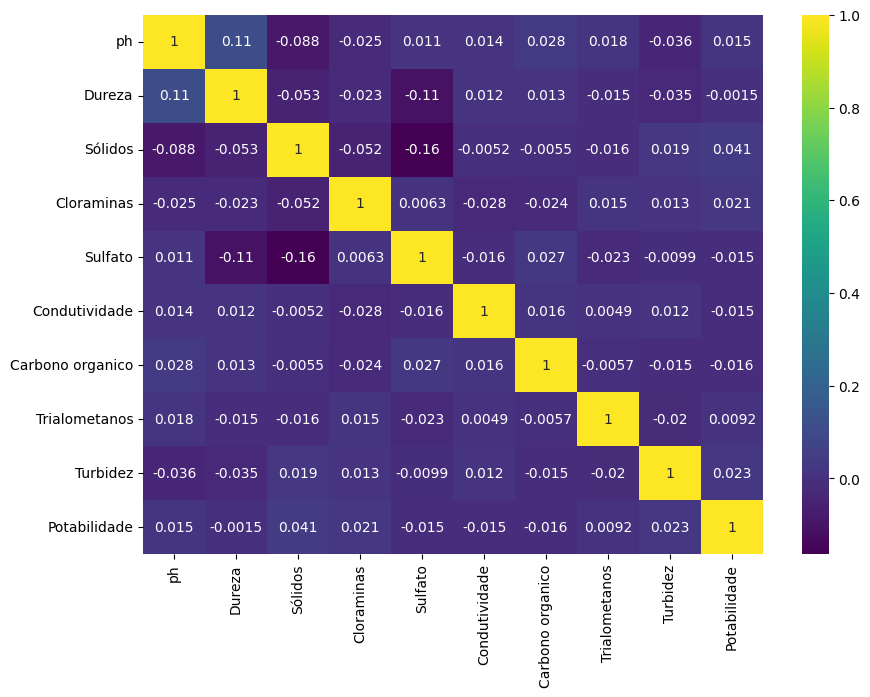

In [104]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### KNN (K Neighbors Classifier)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# matriz de variáveis explicativas
X = df.drop('Potabilidade', axis = 1)

# variável target
y = df.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X


ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
3     0.782466  0.564114  0.011687    0.583804  0.574378      -0.783962   
4     1.275463 -0.455653 -0.455835   -0.370947 -0.560480      -0.348429   
5    -0.954835 -0.234614  0.790645    0.259104 -0.158911      -1.810063   
6     1.994902  1.596951  0.790764    0.239248  1.467140      -1.770608   
7     0.985323  0.226606 -0.954313   -1.622878 -0.726179       0.595858   
...        ...       ...       ...         ...       ...            ...   
3267  1.210411  0.584770 -0.693978   -0.528284 -0.492625      -0.447578   
3268 -0.243774  0.347964 -0.540564    0.362137 -0.697038      -1.205321   
3269  2.800492 -3.100365  1.767503    1.343596 -1.803476       0.165656   
3270 -0.646160 -0.285317  0.488576    0.387023  0.302843      -0.131852   
3271 -1.537172 -0.070075  2.970287    0.020386  0.648718       1.238006   

      Carbono organico  Trialometanos  Turbidez  
3             1.227032       2.111652  0.844761  
4            -0.842154      -2.140399  0.135033  
5            -1.792340      -0.714423 -1.807366  
6            -0.170876       1.132494 -1.662163  
7            -0.599824      -0.224135  0.553348  
...                ...            ...       ...  
3267         -1.341281      -0.705001  0.825626  
3268          0.559422      -2.334474 -0.675183  
3269          0.546021      -1.545585  0.512125  
3270         -0.688929      -0.372108 -0.384562  
3271         -0.139372       0.017846  0.597437  

[2011 rows x 9 columns]

In [105]:
# separa em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste')

Há 2194 dados de treino e 1082 dados de teste


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# instanciamos o modelo especificando o valor desejado de k com o argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors = 45)

In [18]:
# ajustamos o modelo aos dados de treinamento
knn.fit(X_train, y_train);

In [19]:
y_pred = knn.predict(X_test)

In [21]:
# montamos uma tabela com as previsões, indicando se estavam corretas ou não
Df_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index = y_test.index), 
                     y_test == y_pred], 
                    axis = 1
                   )

Df_pred.columns = ['ph', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade',
                   'Carbono organico', 'Trialometanos', 'Turbidez', 'Potabilidade', 
                   'y_pred', 'pred_ok']
Df_pred

ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
2144  0.681224  1.237515  0.696031   -0.587382 -0.191789       1.054141   
854   0.769483  0.068317 -0.514861    0.712287  0.882780      -1.638334   
637  -0.323689 -1.218204 -1.058478    1.657105  0.206936      -0.093614   
2299  0.330639  1.596023 -0.845762   -0.490893 -0.263821      -1.873895   
706  -1.076098 -0.717744  0.715455   -0.848680  0.956362       0.979223   
...        ...       ...       ...         ...       ...            ...   
2043  0.026748 -0.139984  0.383110   -0.332293 -0.339212      -0.089493   
1909 -0.089718  0.076880 -0.580230   -0.500454 -0.818135       0.546189   
847   1.210676 -0.004875  0.209587    0.236027  0.376016       1.549264   
835   0.225586 -0.386348 -0.539067   -1.593065  0.058303       0.328022   
137   0.663466 -0.553809  0.684805    1.181292  0.029466      -0.365647   

      Carbono organico  Trialometanos  Turbidez  Potabilidade  y_pred  pred_ok  
2144         -0.293651       0.888820  0.640518             0       0     True  
854           1.103563      -1.389851  1.834363             0       0     True  
637          -1.195938       0.740636 -0.254329             0       0     True  
2299         -0.797686       1.765332  0.784140             0       0     True  
706           0.954533       0.054315  0.851278             1       0    False  
...                ...            ...       ...           ...     ...      ...  
2043         -0.448942       0.750796  0.693283             1       0    False  
1909          0.207004      -0.326929  0.347889             1       0    False  
847           0.269749       0.591485  0.672709             0       0     True  
835          -1.400908       0.879494 -1.888588             0       0     True  
137           0.474877       0.932607 -0.778299             0       0     True  

[664 rows x 12 columns]

In [22]:
# obtemos a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[370,  29],
       [206,  59]], dtype=int64)

In [24]:
# a coluna 'pred_ok' indica com variáveis booleanos se a previsão estava correta
# a média desta série indica a proporção de classificação correta 
Df_pred['pred_ok'].mean()

0.6460843373493976

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6460843373493976

<AxesSubplot:>

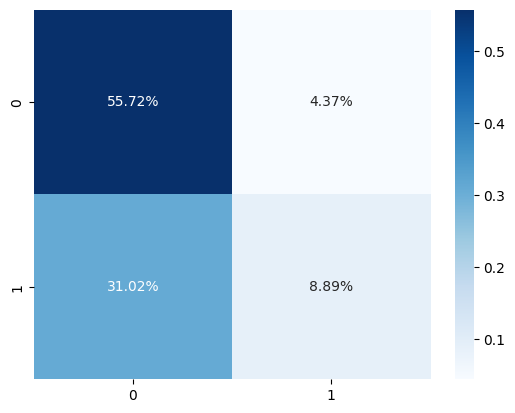

In [26]:
KNN_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [28]:
df.shape

(2011, 10)

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       399
           1       0.67      0.22      0.33       265

    accuracy                           0.65       664
   macro avg       0.66      0.57      0.55       664
weighted avg       0.65      0.65      0.59       664



* precision: Porcentagem de previsões positivas corretas em relação ao total de previsões positivas
* recall: Porcentagem de previsões positivas corretas em relação ao total de positivos reais.
* f1-score: Uma média harmônica ponderada de precisão e recall. Quanto mais próximo de 1, melhor o modelo.

1. O Modelo previu que 43% dos index de cada água são potáveis;
2. De todos os index de cada água que realmente era potável, o modelo só previu esse resultado corretamente para 19% deles;
3. F1-score = 0.26, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não
4. 680 index de água não são potáveis e 402 são potáveis nos dados de teste

#### Naive Bayes

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [92]:
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


#features = X.columns
#X[features] = sc.fit_transform(X[features])
#X


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


In [94]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()